In [1]:
import os
os.environ['R_HOME'] = "C:/PROGRA~1/R/R-43~1.0"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
from sawg.expression_dataset import ExpressionDataset, GenePanelSelection, mFISHtoolsMethod
from sawg.celltype_mapping import ScrattchMapping

In [2]:
directory = '//allen/programs/celltypes/workgroups/rnaseqanalysis/NHP_spatial/gene_panel_runs/'

In [3]:
ai115_tax = ad.read_h5ad('//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/10x_seq/NHP_BG_AIT_115/NHP_BG_AIT115_taxonomy.h5ad')

In [24]:
exp_data = ExpressionDataset(
    expression_data= ai115_tax,
    save_path = directory, # path to save to for later recall
    expression_type = 'logcpm',
    region = 'AIT11.5',
)

gene panel UID: 1686944614.874


In [4]:
exp_data = ExpressionDataset.load_from_timestamp(directory=directory, timestamp='1686944614.874')

create mFISHtoolsMethod  object, run on HPC

In [5]:
mfishtools = mFISHtoolsMethod(exp_data=exp_data)

In [6]:
starting_genes = pd.read_excel('C://Users/stephanies/OneDrive - Allen Institute/NHP_gene_panels/Human_NHP_BG_NSForest_BinaryMarkers_SpatialCurated - Copy.xlsx', sheet_name='Macaque')
starting_genes.head()

,Unnamed: 0,NSF Markers,Level,Pop,Alt,Alt.1,NJJ,Possibly delete,Other levels,Types,Notes and comparison to human genes,Notes,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1.0,ELAVL2,Class,IN,NaN,NaN,NaN,NaN,NaN,NaN,"ELAVL2 slight overlap with D1-NUDAP, good IN m...",NaN,NaN,NaN,NaN,NaN,KEY,NaN
1,NaN,CD96,Class,Granular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RED,Included in 1686249286.703 mFISHpanel
2,2.0,PPP1R1B,Class,MSN,TESC,CRACDL,PPP1R1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOLD,Overlap with Human marker
3,3.0,ETNPPL,Neighborhood,Astrocyte,NaN,NaN,NaN,NaN,Subclass,Astrocyte,NaN,NaN,NaN,NaN,NaN,NaN,Italic,Group only in Macaque
4,4.0,FBXL7,Neighborhood,CCK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sg_list = starting_genes['NSF Markers'].to_list()
sg_list = [g for g in sg_list if type(g)==str]
len(sg_list)

70

In [27]:
gene_ref = pd.read_feather('//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/10x_seq/NHP_BG_AIT_115/genes.feather')

In [28]:
pd.set_option('display.max_rows', None)
gene_ref[gene_ref['gene'].isin(sg_list)]

,old.gene.name,chromosome,feature,start,end,gene_id,strand,gene_length,gene
583,GRIK3,1,gene,187547474,187780584,ENSMMUG00000009679,+,233110.0,GRIK3
2063,ADGRL4,1,gene,145399053,145517260,ENSMMUG00000023345,+,118207.0,ADGRL4
2816,CD96,2,gene,164522453,164630715,ENSMMUG00000000688,-,108262.0,CD96
3037,ARPP21,2,gene,11959308,12114970,ENSMMUG00000015959,-,155662.0,ARPP21
3164,EPHA3,2,gene,182614034,182972527,ENSMMUG00000008242,-,358493.0,EPHA3
3361,WDR49,2,gene,72253460,72472601,ENSMMUG00000022925,-,219141.0,WDR49
3510,SATB1,2,gene,29263973,29392472,ENSMMUG00000019009,+,128499.0,SATB1
4054,RXFP1,5,gene,156135789,156259561,ENSMMUG00000004647,+,123772.0,RXFP1
4475,ETNPPL,5,gene,107074925,107116916,ENSMMUG00000011903,-,41991.0,ETNPPL
4530,VEGFC,5,gene,174014919,174136166,ENSMMUG00000003748,-,121247.0,VEGFC


In [8]:
mfishtools.filter_genes(starting_genes=sg_list, num_binary_genes=3000)

In [10]:
mfishtools.run_directory

'//allen/programs/celltypes/workgroups/rnaseqanalysis/NHP_spatial/gene_panel_runs/1686944614.874'

In [29]:
job = mfishtools.select_gene_panel(size=300, cluster_label='Cluster', docker='singularity exec /allen/programs/celltypes/workgroups/rnaseqanalysis/bicore/singularity/scrattch_mapping_0.2.sif')

building temp ad_h5ad
building HPC job


KeyboardInterrupt: 

Load gene_list.csv exported from mFISHtools

In [12]:
mft_panel = mfishtools.load_gene_panel()
mft_panel

deleting mfishtools temp file...


Use ScrattchMapping to create confusion matrix

In [13]:
panel_meta = mft_panel.args
mft_panel.eval_method(method = ScrattchMapping(
    sp_data = mft_panel.exp_data.expression_data[: , mft_panel.gene_panel],
    taxonomy_path = '//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/10x_seq/NHP_BG_AIT_115/',
    meta = {
        'gene panel method': str(mft_panel.method),
        'gene panel meta': panel_meta,
    }
)
)

In [14]:
ad_map_args = {'save_path': directory}
hpc_args = {
    'job_path': directory,
    'output': directory + 'hpc_logs/%j.out',
    'error': directory + 'hpc_logs/%j.err',
}
docker = 'singularity exec /allen/programs/celltypes/workgroups/rnaseqanalysis/bicore/singularity/scrattch_mapping_0.2.sif'

job = mft_panel.eval.run_on_hpc(ad_map_args, hpc_args, docker=docker)

probe type not set in ad_sp.var, assuming only genes in ad_sp.var...
building HPC job
<JobState RUNNING> 9699527


In [16]:
mft_panel.run_directory

'//allen/programs/celltypes/workgroups/rnaseqanalysis/NHP_spatial/gene_panel_runs/1686944614.874'

In [20]:
mft_panel.eval.load_scrattch_mapping_results()

loading results...
analysis UID: 1686944614.874
deleting scrattch-mapping temp file...


<AxesSubplot: xlabel='score.Corr', ylabel='Count'>

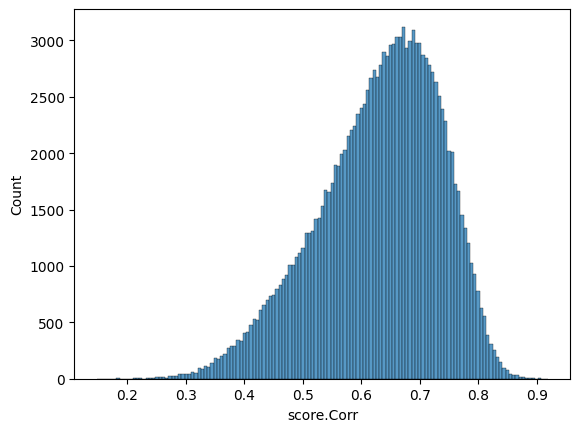

In [21]:
sns.histplot(mft_panel.eval.ad_map.obs['score.Corr'])

In [22]:
pivot_cols = {
    'cluster': ['Cluster', 'cluster_Corr'],
    'subclass': ['Subclass', 'level3.subclass_Corr'],
    'neighborhood': ['Neighborhood', 'level2.neighborhood_Corr'],
    'class': ['Class', 'level1.class_Corr']
}

norm_conf_matrix = mft_panel.eval.get_confusion_matrix(pivot_cols)

<AxesSubplot: xlabel='Annotated', ylabel='Mapped'>

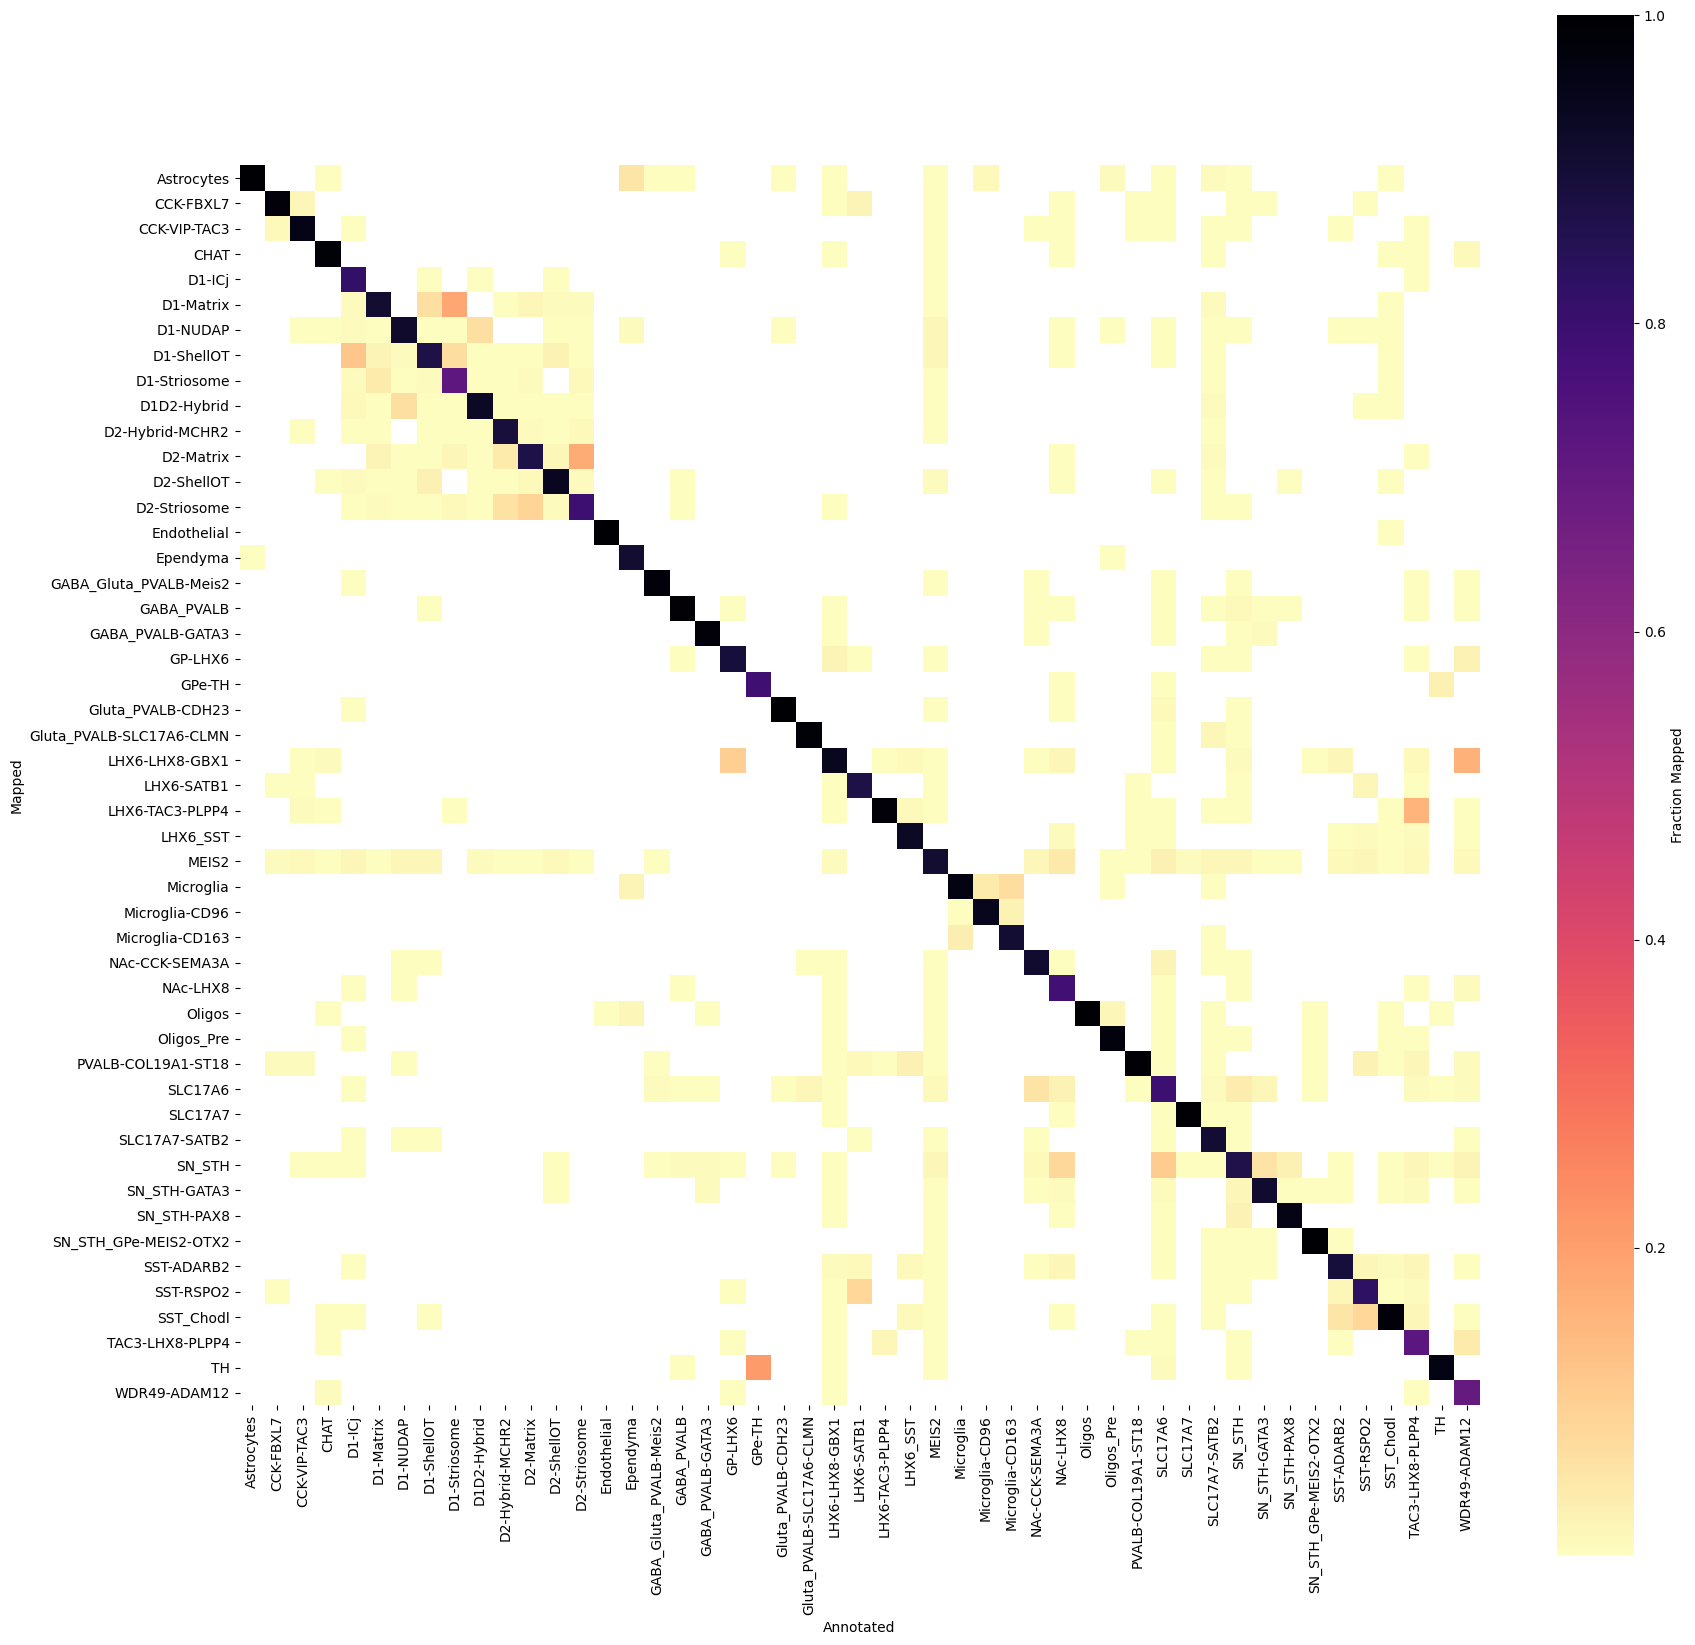

In [23]:
fig, ax = plt.subplots(figsize=(20,20))
matrix = norm_conf_matrix['subclass'].dropna(how='all')
matrix = matrix.loc[matrix.columns]
matrix.index.name = 'Mapped'
sns.heatmap(matrix, cmap='magma_r', vmax=1, ax=ax, square=True,cbar_kws={'label': 'Fraction Mapped'})

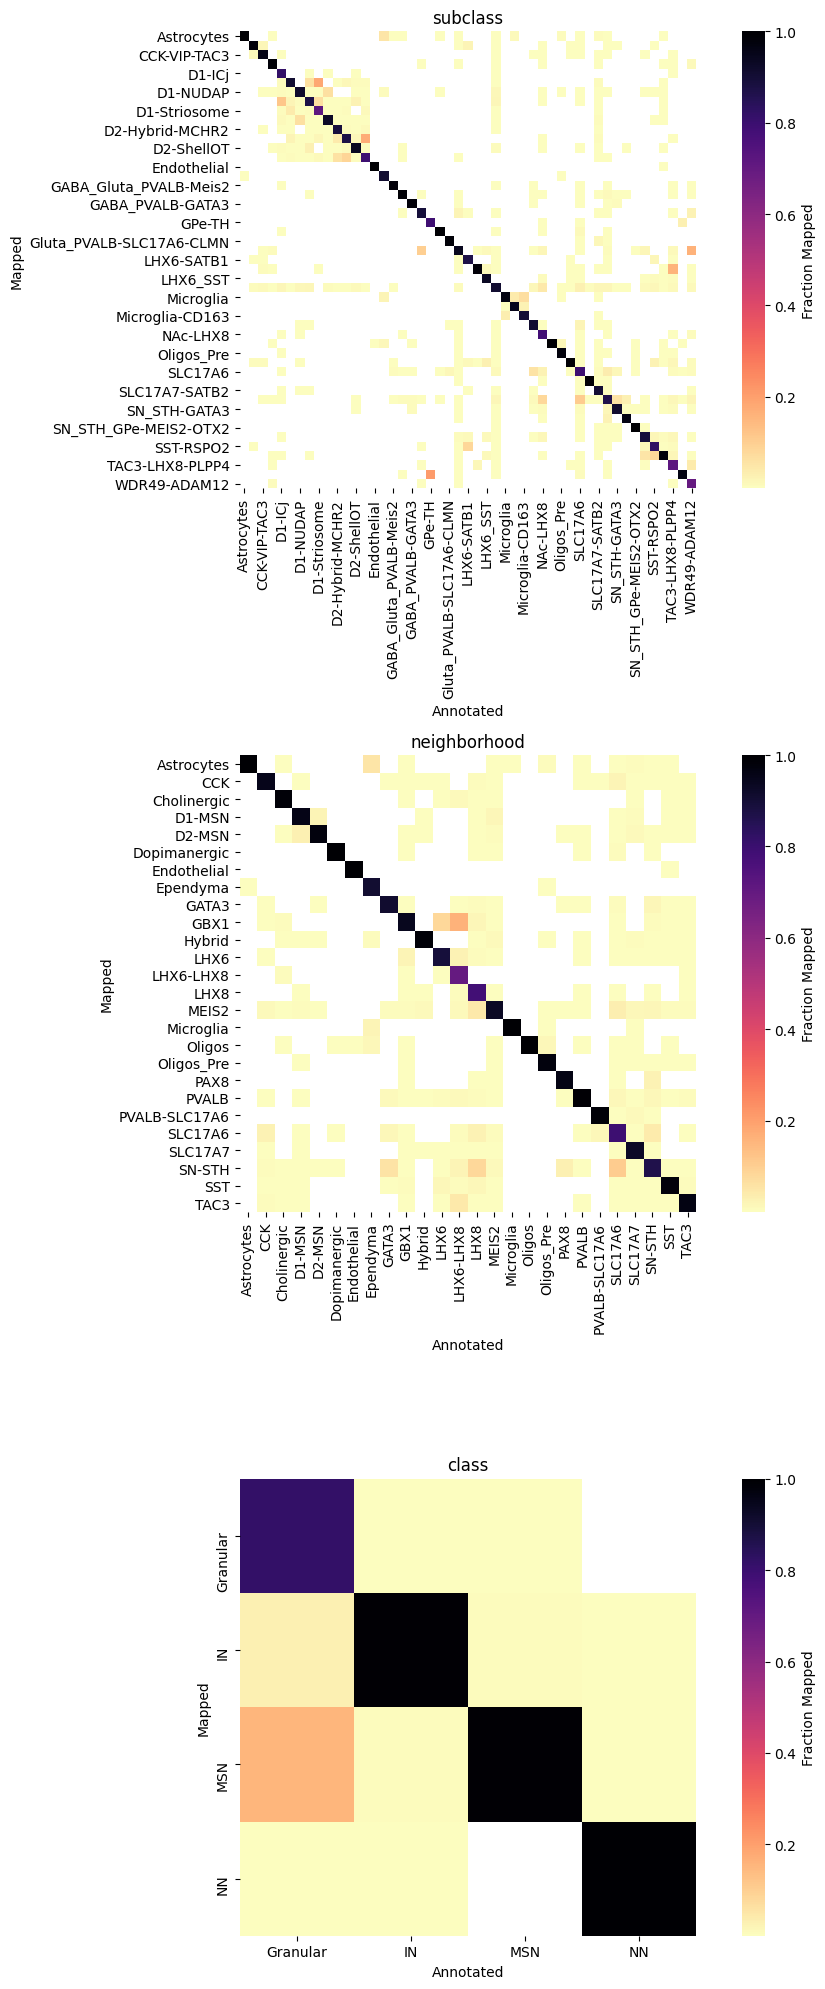

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(10, 20))
                    
for i, level in enumerate(['subclass', 'neighborhood', 'class']):
    matrix = norm_conf_matrix[level].dropna(how='all')
    matrix = matrix.loc[matrix.columns]
    matrix.index.name = 'Mapped'
    sns.heatmap(matrix, cmap='magma_r', vmax=1, ax=ax[i], square=True,cbar_kws={'label': 'Fraction Mapped'})
    ax[i].set_title(level)
plt.tight_layout()

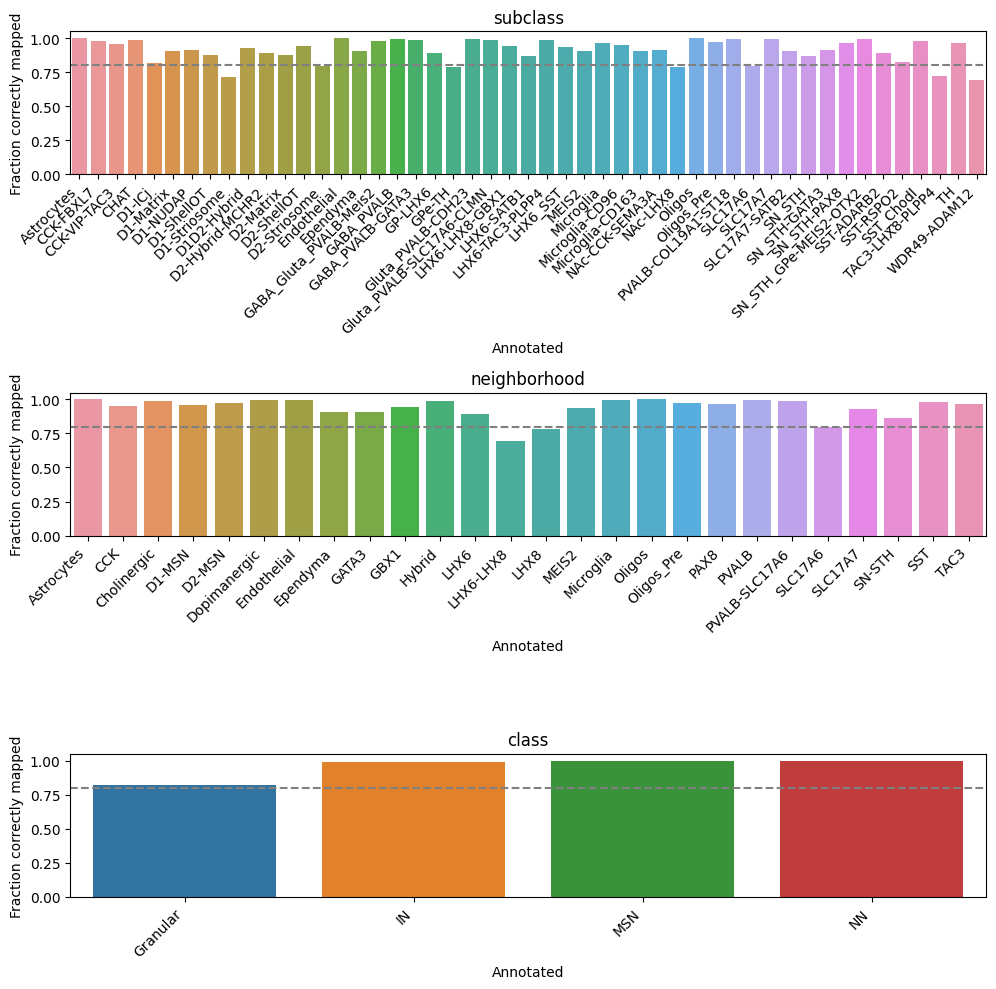

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
                    
for i, level in enumerate(['subclass', 'neighborhood', 'class']):
    matrix = norm_conf_matrix[level].dropna(how='all')
    matrix = matrix.loc[matrix.columns]
    frac_mapped = pd.DataFrame(np.diag(matrix), index=matrix.columns, columns=['Fraction correctly mapped'], dtype=float)
    sns.barplot(data=frac_mapped, x=frac_mapped.index, y='Fraction correctly mapped', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    ax[i].set_title(level)
    ax[i].axhline(0.8, ls='--', c='grey')
plt.tight_layout()

MemoryError: Unable to allocate 146. GiB for an array with shape (140027, 140027) and data type float64

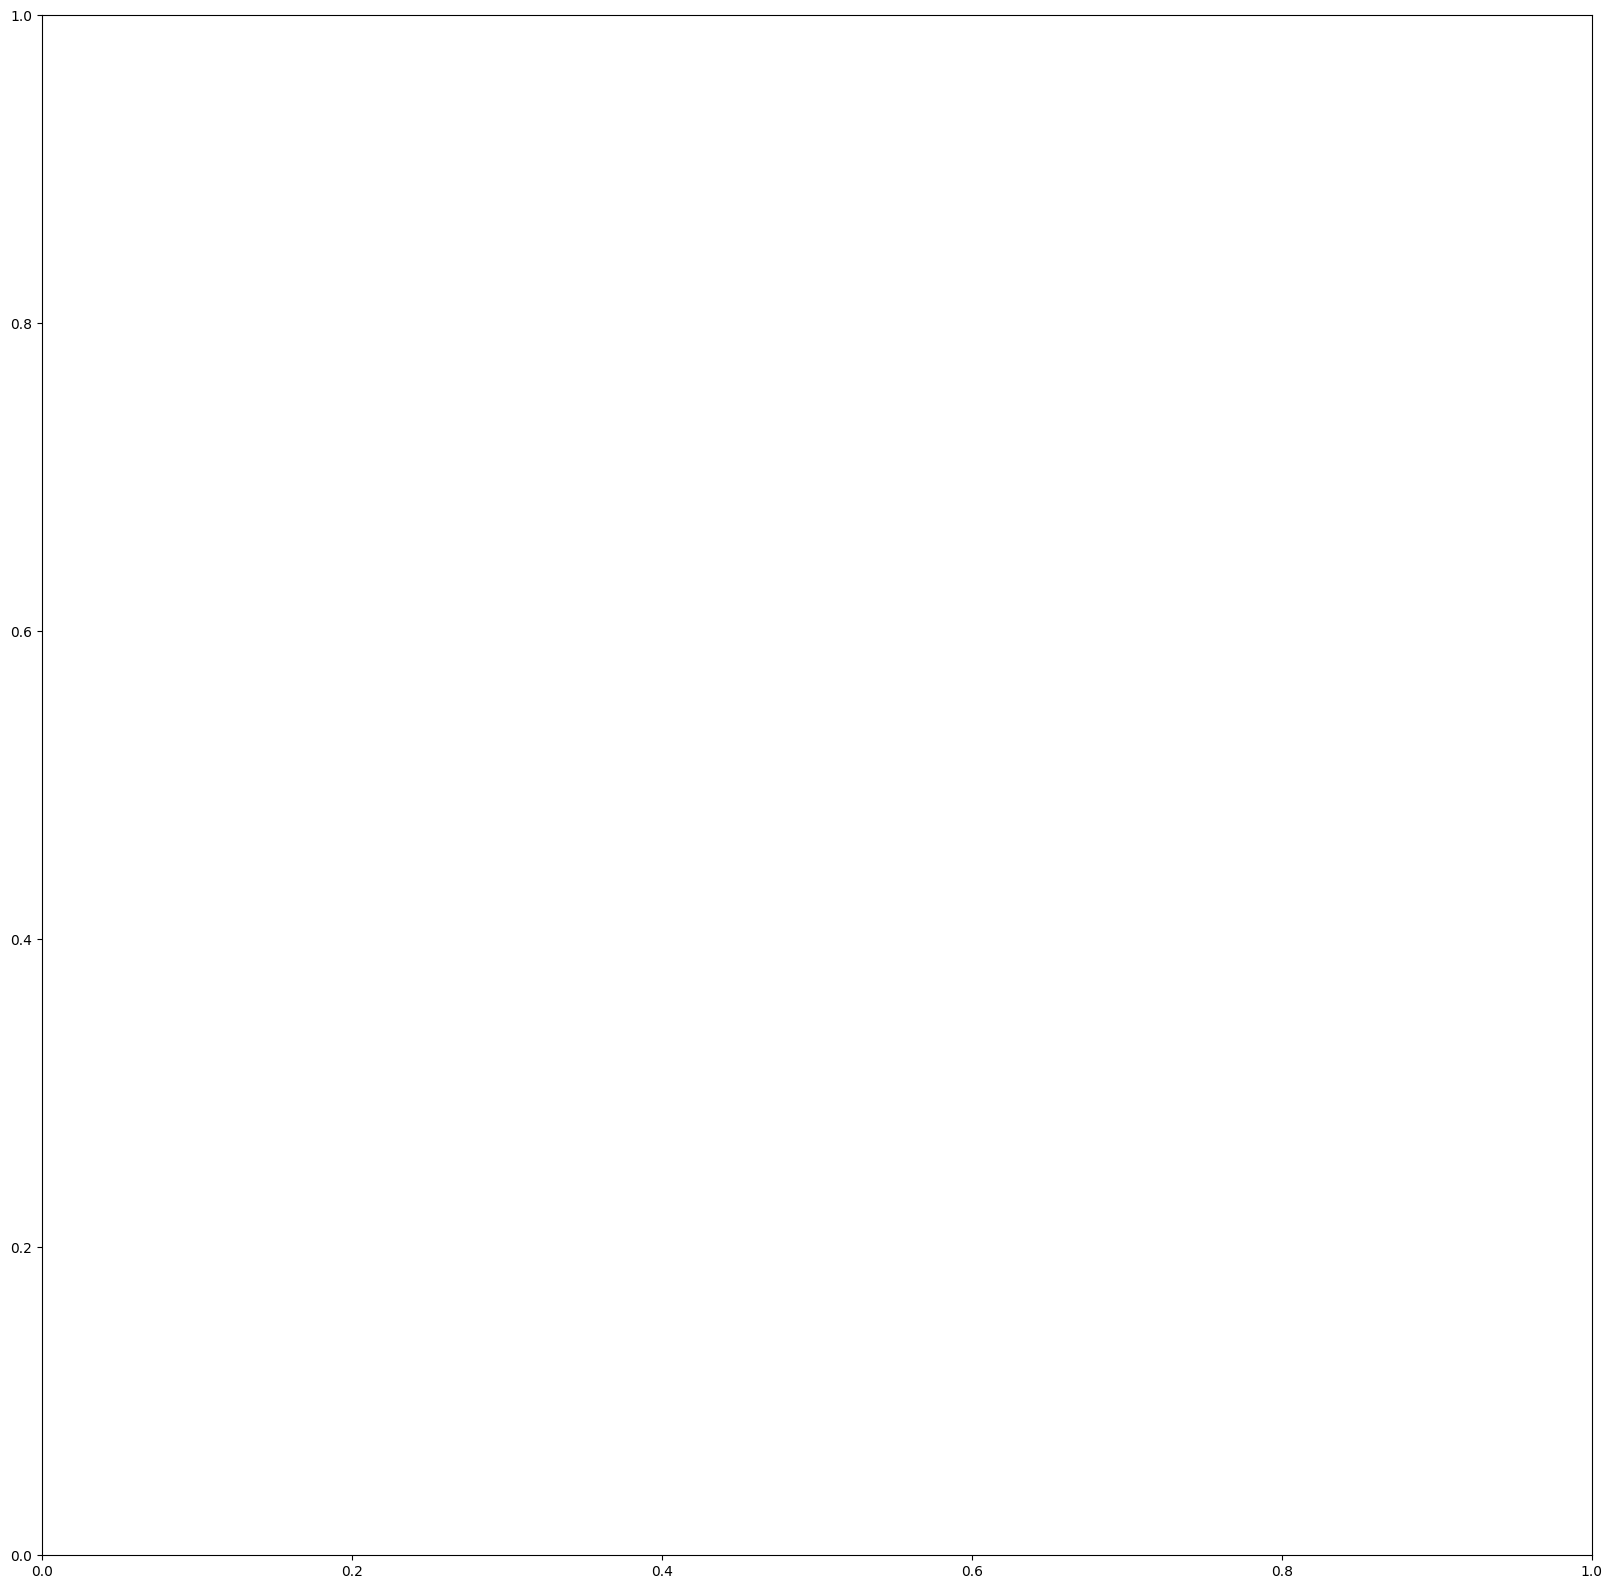

In [30]:
cluster_order = mft_panel.exp_data.expression_data.obs.sort_values(['Class', 'Neighborhood', 'Subclass'])['Cluster']

fig, ax = plt.subplots(figsize=(20,20))
matrix = norm_conf_matrix['cluster'].dropna(how='all')
matrix = matrix[cluster_order]
matrix = matrix.loc[matrix.columns]
matrix.index.name = 'Mapped'
sns.heatmap(matrix, cmap='plasma', vmax=1, ax=ax, square=True,cbar_kws={'label': 'Fraction Mapped'})

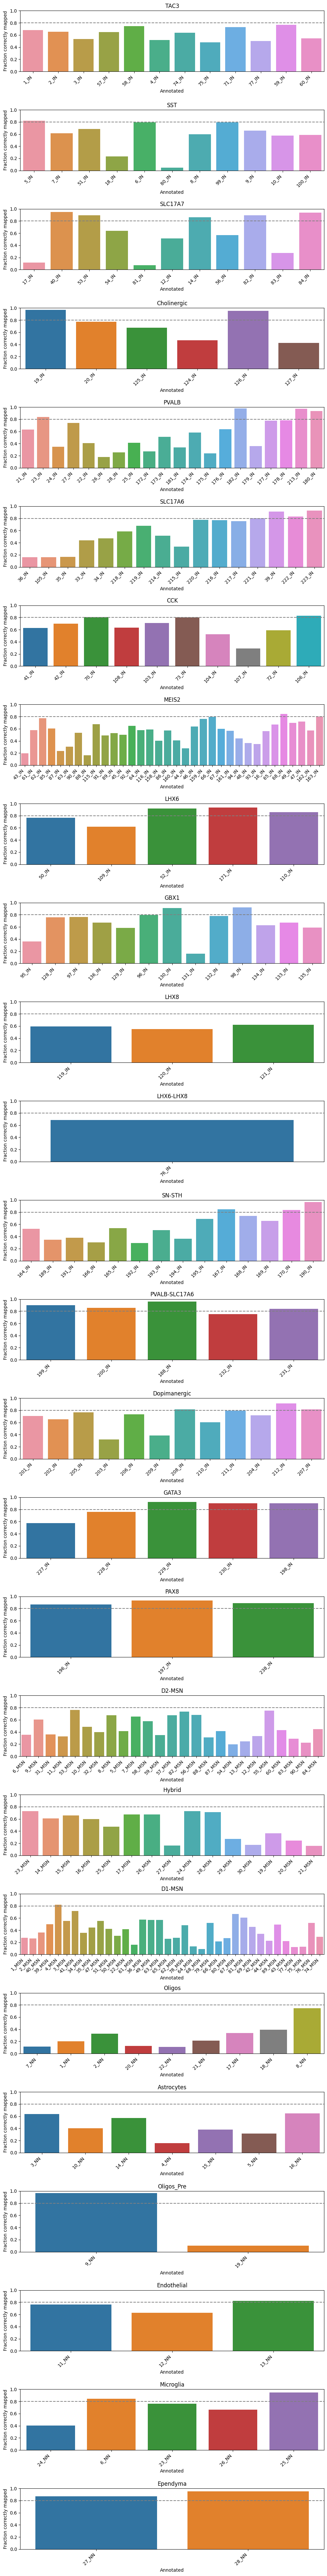

In [63]:
clusters = norm_conf_matrix['cluster'].dropna(how='all')
clusters = clusters.loc[clusters.columns]
frac_mapped = pd.DataFrame(np.diag(clusters), index=clusters.columns, columns=['Fraction correctly mapped'], dtype=float)
neighborhoods = mft_panel.exp_data.expression_data.obs.drop_duplicates()[['Neighborhood', 'Cluster']].set_index('Neighborhood').drop_duplicates()
n_neighborhoods = len(neighborhoods.index.unique())


fig, ax = plt.subplots(n_neighborhoods, 1, figsize=(10, 3*n_neighborhoods))

for i, neighborhood in enumerate(neighborhoods.index.unique()):
    cluster_list = neighborhoods.loc[neighborhood]['Cluster']
    if type(cluster_list) == str:
        cluster_list = [cluster_list]
    frac_mapped_clust = frac_mapped.loc[cluster_list]
    sns.barplot(data=frac_mapped_clust, x=frac_mapped_clust.index, y='Fraction correctly mapped', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
    ax[i].set_title(neighborhood)
    ax[i].axhline(0.8, ls='--', c='grey')
    ax[i].set_ylim(0, 1)
plt.tight_layout()